In [45]:
import numpy as np
import json
from scipy import stats
import matplotlib.pyplot as plt

DATA_LOCATION = '/Users/brendan/Documents/projects/risky_sir/go/data/'
FILE = DATA_LOCATION + "full_results.json"
with open(FILE) as file:
    data = json.load(file)
    
HETERO = data['Heterogeneous']
HOMO = data['Homogeneous']
RISK_STRUCTURED = data['RiskStructured']

EXTINCTION_CUTOFF = 50
TRIALS = 10

linestyles = ['-', '--', ':']
colors = ["blue", "magenta", "red"]

In [46]:
# number of individuals
N = 1000
# chance of spreading per individual before recovering
a = 3/1000

In [79]:
def compute_g(a, b, p, N=1000):
    upper_g = 1
    lower_g = 0
    for T in range(1000):
        g = (upper_g + lower_g)/2
        g_ = p*(((1 - p*b)*(1 - a) + (1 - (1-p*b)*(1-a))*g)**N) + (1 - p)*((1 - a + a * g)**N)
        if g_ < g:
            upper_g = g
        else:
            lower_g = g
    return g

compute_g(1/1000., 0.1/1000., 0.5)

0.951646823398564

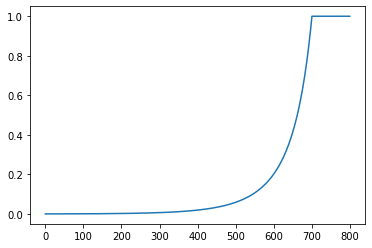

In [110]:
gs = []
for R0 in np.arange(0, 8, 0.01):
    gs.append(compute_g((8-R0)/N, 0, 0))
plt.plot(gs)

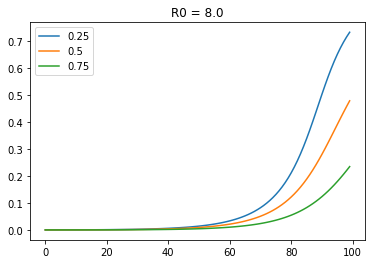

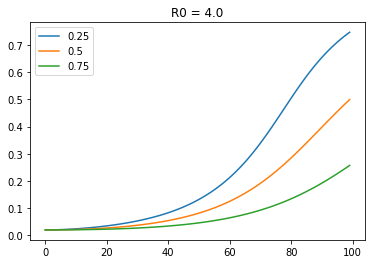

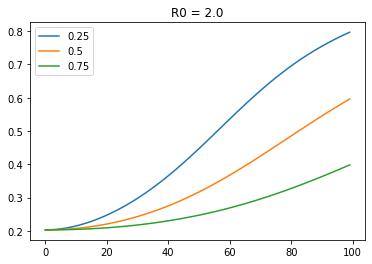

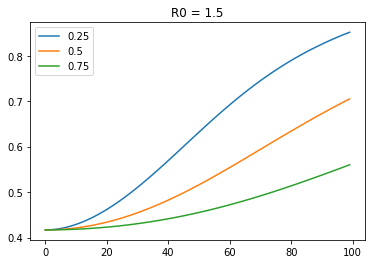

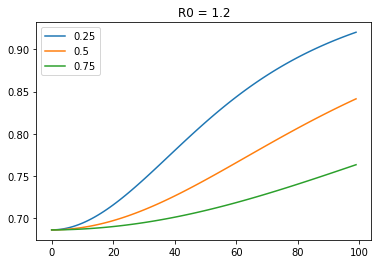

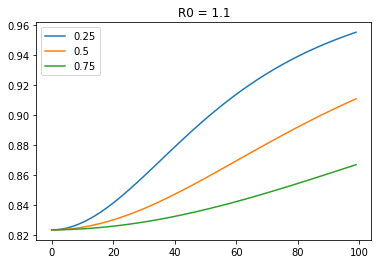

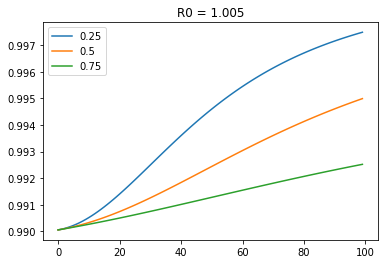

In [107]:
for R0 in [8.0, 4.0, 2.0, 1.5, 1.2, 1.1, 1.005]:
    for p in [0.25, 0.5, 0.75]:
        gs = []
        for i in np.arange(0, 1, 0.01):
            alpha_c = R0/N * (1-i)
            alpha_r = (R0/N - alpha_c)/(p**2)
            gs.append(compute_g(alpha_c, alpha_r, p))
        plt.plot(gs, label=p)
    plt.legend()
    plt.title(f'R0 = {R0}')
    #plt.ylim([0, 1])
    plt.show()

Text(0, 0.5, 'Extinction probability (computed)')

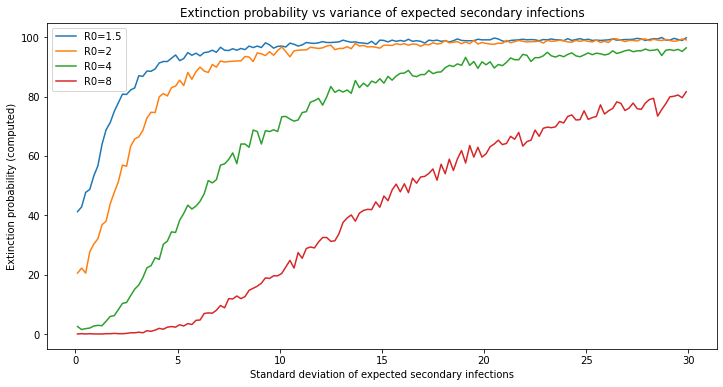

In [48]:
plt.figure(figsize=(12, 6))
for entry in HETERO:
    mu = entry['TrialResults'][0]['Parameters']['AlphaDist']['Mu']
    stds = []
    extinction_probs = []
    for tr in entry['TrialResults']:
        stds.append(tr['SimulationResults']['Parameters']['AlphaDist']['Std'])
        extinction_probs.append(len([r for r in tr['SimulationResults']['FinalRs'] if r < EXTINCTION_CUTOFF])/TRIALS)
    plt.plot(stds, extinction_probs, label=f'R0={mu}')
plt.legend()
plt.title('Extinction probability vs variance of expected secondary infections')
plt.xlabel('Standard deviation of expected secondary infections')
plt.ylabel('Extinction probability (computed)')

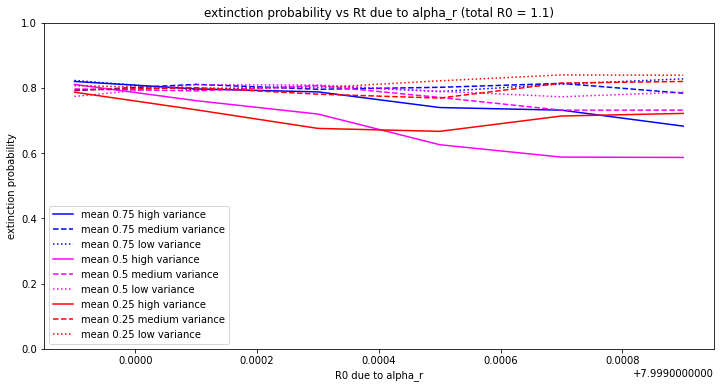

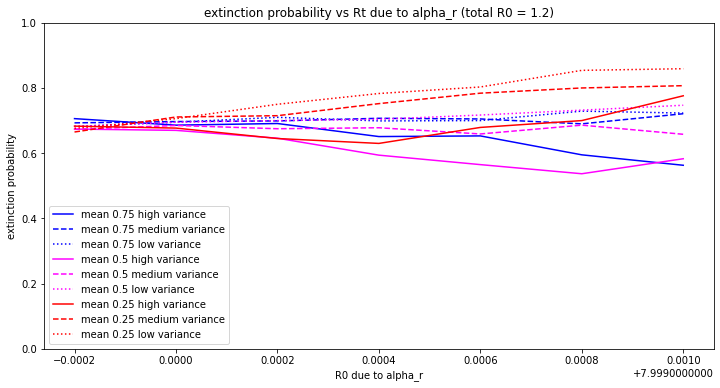

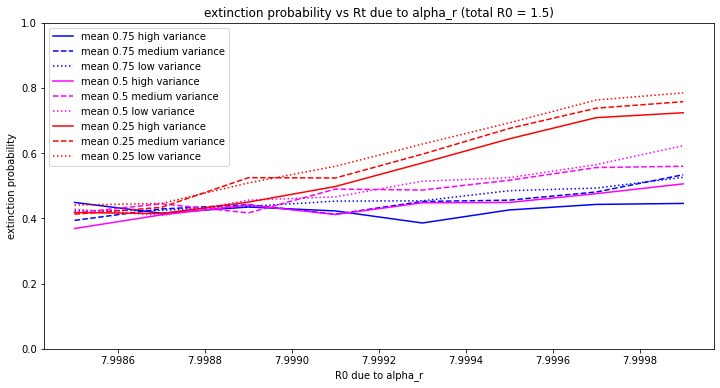

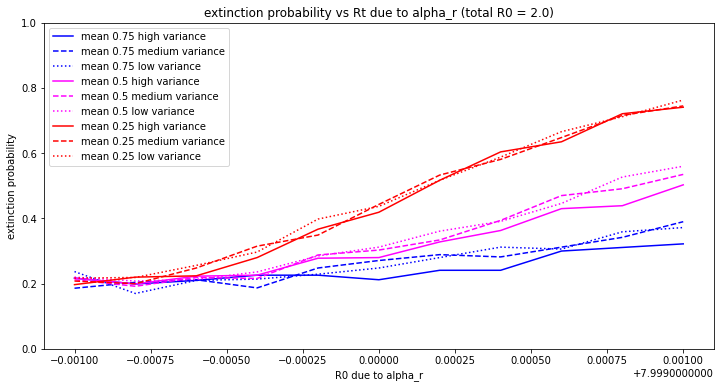

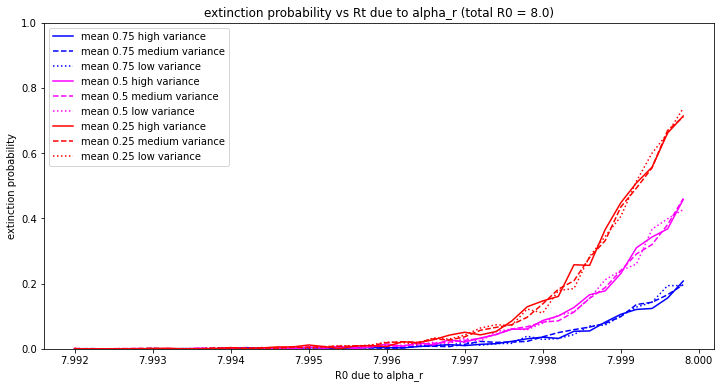

In [105]:
for R0, RISK_ in RISK_STRUCTURED.items():
    
    plt.figure(figsize=(12, 6))
    plt.ylabel('extinction probability')
    plt.xlabel('R0 due to alpha_r')
    plt.title(f'extinction probability vs Rt due to alpha_r (total R0 = {R0})')
    
    
    
    for i, p in enumerate(['75', '5', '25']):
        for j, var in enumerate(['high', 'medium', 'low']):
            series = RISK_[i*3 + j]
            alphaCs = []
            extinction_probs = []
            for tr in series['TrialResults']:
                alphaCs.append(8 - tr['Parameters']['AlphaC'])
                extinction_probs.append(len([r for r in tr['SimulationResults']['FinalRs'] if r < 50])/N)
            # colors might be wrong here:
            plt.plot(alphaCs, extinction_probs, label=f'mean 0.{p} {var} variance', color=colors[i], linestyle=linestyles[j])
    plt.legend()
    plt.ylim([0, 1])

In [26]:
for var in ['high', 'medium', 'low']:
    FILE = f'{DATA_LOCATION}/extinctions_risk_p05_{var}.json'
    with open(FILE) as file:
        data = json.load(file)
    alphaCs = []
    extinction_probs = []
    for tr in data['TrialResults']:
        alphaCs.append(8 - tr['AlphaC'])
        extinction_probs.append(len([r for r in tr['FinalRs'] if r < 100])/N)
    plt.plot(alphaCs, extinction_probs, label=var)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/brendan/Documents/projects/risky_sir/go/data//extinctions_risk_p05_high.json'

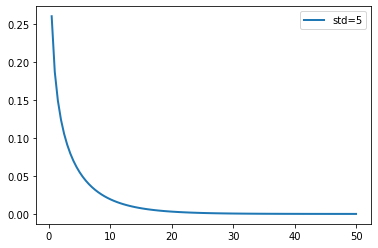

In [408]:
mu = 4

for std in [5]:
    x = np.linspace(0, 50, 100)
    #plt.plot(x, 0*x, '--', c='black')


    alpha = mu * mu / (std * std)
    beta = mu / (std * std)

    scale = 1/beta
    g = stats.gamma(alpha, scale=scale)
    plt.plot(x, g.pdf(x), lw=2, label=f'std={std}')
plt.legend()

#g.std()

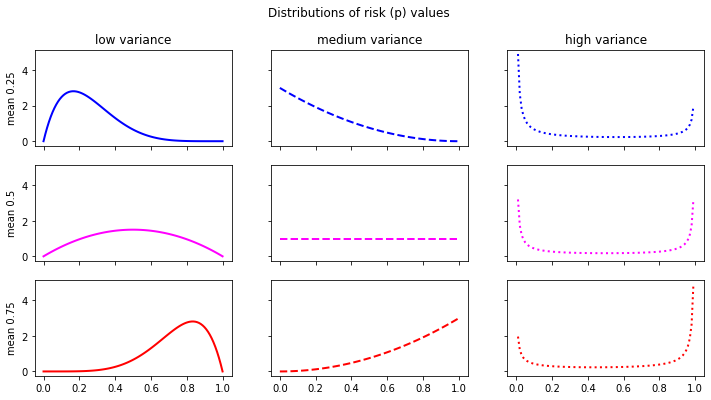

In [513]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 6))
fig.suptitle("Distributions of risk (p) values")
bases = [(1, 3, "mean 0.25"), (1, 1, "mean 0.5"),  (3, 1, "mean 0.75")]
factors = [(2, "low variance"), (1, "medium variance"), (0.1, "high variance")]
for i, (a, b, desc_i) in enumerate(bases):
    for j, (f, desc_j) in enumerate(factors):
        

        x = np.linspace(0, 1, 100)

        g = stats.beta(f*a, f*b)
        axs[i][j].plot(x, g.pdf(x), lw=2, color=colors[i], linestyle=linestyles[j])
        if (i == 0):
            axs[i][j].set_title(desc_j)
        if (j == 0):
            axs[i][j].set_ylabel(desc_i)
        #plt.legend()

#g.std()